Ким И.В, М8О-114СВ-24

Лабораторная работа 1.

Градиентный спуск и его модификации \
Выбрать тестовые функции оптимизации (2 шт) \
Запрограммировать собственную реализацию классического градиентного спуска \
Запрограммировать пайплайн тестирования алгоритма оптимизации \
Визуализации функции и точки оптимума \
Вычисление погрешности найденного решения в сравнение с аналитическим для нескольких запусков \
Визуализации точки найденного решения (можно добавить анимацию на плюс балл) \
Запрограммировать метод вычисления градиента \
Передача функции градиента от пользователя \
Символьное вычисление градиента (например с помощью sympy) (на доп балл) \
Численная аппроксимация градиента (на доп балл) \
Запрограммировать одну моментную модификацию и протестировать ее \
Запрограммировать одну адаптивную модификацию и протестировать ее \
Запрограммировать метод эволюции темпа обучения и/или метод выбора начального приближения и протестировать их \

Функция Розенброка

Функция Химмельблау

In [3]:
import numpy as np

def rosenbrock(x, y):
    return (1 - x)**2 + 100 * (y - x**2)**2

def rosenbrock_grad(x, y, a=1, b=100):
    grad_x = -2 * (1 - x) - 4 * 100 * (y - x**2) * x
    grad_y = 2 * 100 * (y - x**2)
    return np.array([grad_x, grad_y])


def symbol_rosenbrock_grad():
    pass


# Функция Химмельблау
def himmelblau(x, y):
    return (x**2 + y - 11)**2 + (x + y**2 - 7)**2

# Градиенты (производные) функции Химмельблау
def himmelblau_grad(x, y):
    grad_x = 4 * x * (x**2 + y - 11) + 2 * (x + y**2 - 7)
    grad_y = 2 * (x**2 + y - 11) + 4 * y * (x + y**2 - 7)
    return np.array([grad_x, grad_y])

    # Градиент функции Розенброка: [-400*x*(-x**2 + y) + 2*x - 2, -200*x**2 + 200*y]
    # Градиент функции Химмельблау: [4*x*(x**2 + y - 11) + 2*x + 2*y**2 - 14, 2*x**2 + 4*y*(x + y**2 - 7) + 2*y - 22]

def symbol_himmelblau_grad(x,y):
    pass

In [4]:
def classical_gradient_descent(start_point, grad_func, learning_rate = 0.0001, max_iter=1000, tolerance = 1e-6):
    print("start_point: ", start_point)
    print("learning_rate: ", learning_rate)
    print("max_iter: ", max_iter)

    x = np.array(start_point, dtype='float64')
    history = [x.copy()]

    for i in range(max_iter):
        grad = grad_func(*x)
        new_x = x - learning_rate * grad

        # Сохраняем каждую точку для визуализации
        history.append(new_x.copy())

        # Проверяем условие остановки (если изменения меньше tolerance)
        if np.linalg.norm(new_x - x) < tolerance:
            print(f"Алгоритм сошелся за {i+1} итераций.")
            break

        x = new_x

    return x, np.array(history)

Пайплайн:
start_point

lerning rate

gradient



# Пайплайн:

In [5]:
def pipline_test(start_point, grad_func, res, method, learning_rate = 0.0001, max_iter=1000, tolerance = 1e-6):

    if method == 'classic':
        x, history = classical_gradient_descent(start_point, grad_func, learning_rate, max_iter)

    print("x = ", x)
    print("history = ", history)
    print(f"{method}: Error + {np.linalg.norm(res - x) }")

In [6]:
methods = ['classic']

learning_rate = 0.0001
max_iter = 100000
res = (1,1)
start_point = (1.2,1.2)

for method in methods:
    print("Rosenbrock:")
    learning_rate = 0.0001
    max_iter = 100000
    res = (1,1)
    start_point = (1.2,1.2)
    pipline_test(start_point, rosenbrock_grad, res, method, learning_rate, max_iter)

    print("\nHimmelblau:")
    learning_rate = 0.0001
    max_iter = 100000
    res = (3,2)
    start_point = (2.5,2.5)
    pipline_test(start_point, himmelblau_grad, res, method, learning_rate, max_iter)


Rosenbrock:
start_point:  (1.2, 1.2)
learning_rate:  0.0001
max_iter:  100000
Алгоритм сошелся за 61724 итераций.
x =  [1.01128105 1.0227342 ]
history =  [[1.2        1.2       ]
 [1.18844    1.2048    ]
 [1.178534   1.20895179]
 ...
 [1.01128149 1.0227351 ]
 [1.01128105 1.0227342 ]
 [1.01128061 1.0227333 ]]
classic: Error + 0.025379242006838526

Himmelblau:
start_point:  (2.5, 2.5)
learning_rate:  0.0001
max_iter:  100000
Алгоритм сошелся за 2791 итераций.
x =  [2.9998514  2.00035859]
history =  [[2.5        2.5       ]
 [2.5019     2.4987    ]
 [2.50379442 2.49740387]
 ...
 [2.99985102 2.00035952]
 [2.9998514  2.00035859]
 [2.99985178 2.00035767]]
classic: Error + 0.0003881619968795047


# Визуализация функций


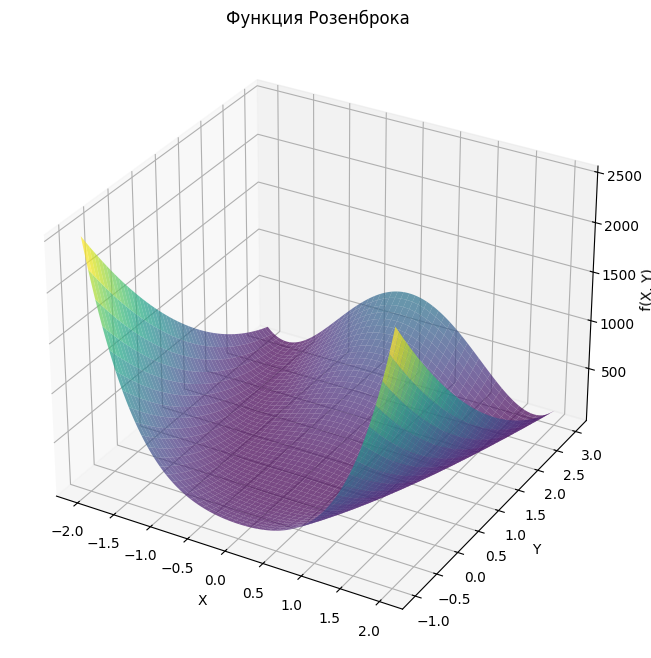

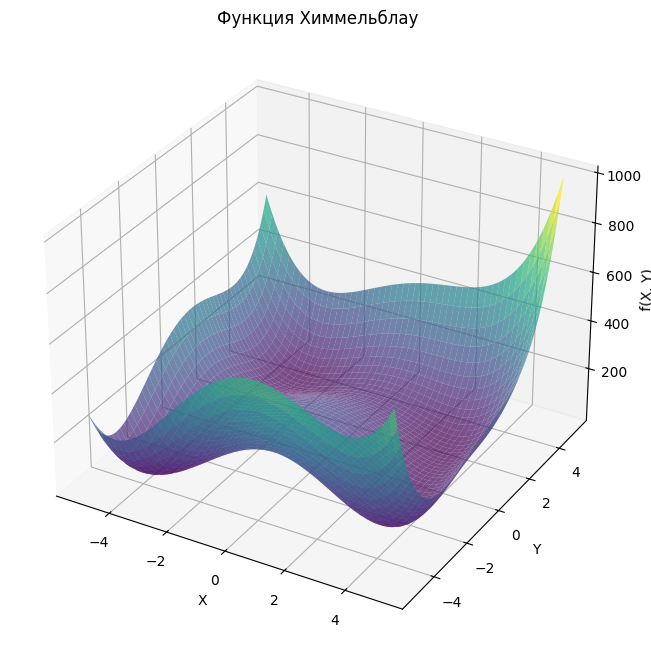

In [7]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Функция для визуализации
def plot_3d_function(func, x_range=(-2, 2), y_range=(-2, 2), title='Function Plot'):
    x = np.linspace(x_range[0], x_range[1], 400)
    y = np.linspace(y_range[0], y_range[1], 400)
    X, Y = np.meshgrid(x, y)
    Z = func(X, Y)

    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Построение поверхности
    ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none', alpha=0.7)

    # Настройка осей
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('f(X, Y)')
    ax.set_title(title)

    plt.show()

# Визуализация функции Розенброка
plot_3d_function(rosenbrock, x_range=(-2, 2), y_range=(-1, 3), title='Функция Розенброка')

# Визуализация функции Растригина
plot_3d_function(himmelblau, x_range=(-5.12, 5.12), y_range=(-5.12, 5.12), title='Функция Химмельблау')

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Целевая функция
def func(x, y):
    return x**2 + y**2

# Градиент функции
def grad_func(x, y):
    return np.array([2*x, 2*y])

def visualize_gradient_descent(history, func, func_name):
    x_vals = np.linspace(-2, 2, 400)
    y_vals = np.linspace(-1, 3, 400)
    X, Y = np.meshgrid(x_vals, y_vals)
    Z = func(X, Y)

    plt.figure(figsize=(8, 6))
    plt.contour(X, Y, Z, levels=np.logspace(-1, 3, 20), cmap='viridis')

    history = np.array(history)
    plt.plot(history[:, 0], history[:, 1], 'r-', linewidth=1, label='Траектория градиентного спуска')

    # Отметим начальную и конечную точки
    plt.scatter(history[0, 0], history[0, 1], color='green', marker='o', label='Начальная точка', zorder=5)
    plt.scatter(history[-1, 0], history[-1, 1], color='blue', marker='x', label='Конечная точка', zorder=5)

    # Установим границы графика поближе к траектории
    plt.xlim(min(history[:, 0]) - 0.1, max(history[:, 0]) + 0.1)
    plt.ylim(min(history[:, 1]) - 0.1, max(history[:, 1]) + 0.1)

    plt.title('Траектория градиентного спуска на функции ' + func_name)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()


In [ ]:
history


array([[0.9       , 1.2       ],
       [0.91406   , 1.1922    ],
       [0.92711879, 1.18506611],
       ...,
       [1.01128163, 1.02273538],
       [1.01128119, 1.02273448],
       [1.01128075, 1.02273359]])

In [ ]:
len(history)

10001

In [9]:

# Выполняем градиентный спуск
final_point, history = classical_gradient_descent((0,0), rosenbrock_grad,learning_rate=0.01, max_iter = 2000)


start_point:  (0, 0)
learning_rate:  0.01
max_iter:  2000


<ipython-input-3-992ebfbddd22>:7: RuntimeWarning: overflow encountered in scalar power
  grad_x = -2 * (1 - x) - 4 * 100 * (y - x**2) * x
<ipython-input-3-992ebfbddd22>:8: RuntimeWarning: overflow encountered in scalar power
  grad_y = 2 * 100 * (y - x**2)
<ipython-input-3-992ebfbddd22>:7: RuntimeWarning: invalid value encountered in scalar subtract
  grad_x = -2 * (1 - x) - 4 * 100 * (y - x**2) * x
<ipython-input-3-992ebfbddd22>:8: RuntimeWarning: invalid value encountered in scalar subtract
  grad_y = 2 * 100 * (y - x**2)


In [ ]:
final_point, history = classical_gradient_descent(
    start_point=(1.2, 1.2),  # начальная точка ближе к оптимуму
    grad_func=rosenbrock_grad,
    learning_rate=0.0001,      # уменьшенный шаг обучения
    max_iter=100000             # больше итераций для более точной сходимости
)

start_point:  (1.2, 1.2)
learning_rate:  0.0001
max_iter:  100000
Алгоритм сошелся за 61724 итераций.


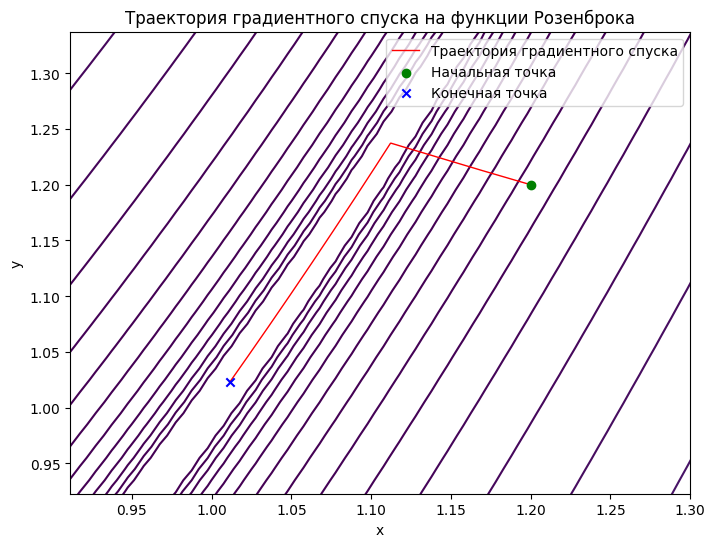

In [ ]:
visualize_gradient_descent(history, rosenbrock, "Розенброка")

In [ ]:
final_point, history = classical_gradient_descent(
    start_point=(0, 0),  # начальная точка ближе к оптимуму
    grad_func=himmelblau_grad,
    learning_rate=0.00001,      # уменьшенный шаг обучения
    max_iter=100000             # больше итераций для более точной сходимости
)

start_point:  (0, 0)
learning_rate:  1e-05
max_iter:  100000
Алгоритм сошелся за 22895 итераций.


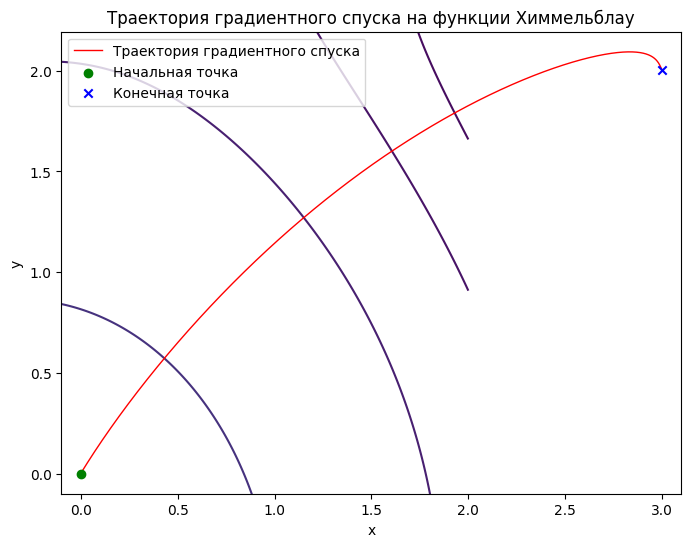

In [ ]:
visualize_gradient_descent(history, himmelblau, "Химмельблау")

# Символьное вычисление градиента

In [ ]:
import sympy as sp
x, y = sp.symbols('x y')

rosenbrock_s = 100 * (y - x**2)**2 + (1 - x)**2

himmelblau_s = (x**2 + y - 11)**2 + (x + y**2 - 7)**2

rosenbrock_grad_s = [sp.diff(rosenbrock_s, var) for var in (x, y)]
print("Градиент функции Розенброка:", rosenbrock_grad)

himmelblau_grad_s = [sp.diff(himmelblau_s, var) for var in (x, y)]
print("Градиент функции Химмельблау:", himmelblau_grad)

Градиент функции Розенброка: [-400*x*(-x**2 + y) + 2*x - 2, -200*x**2 + 200*y]
Градиент функции Химмельблау: [4*x*(x**2 + y - 11) + 2*x + 2*y**2 - 14, 2*x**2 + 4*y*(x + y**2 - 7) + 2*y - 22]


# Моментная модификация

# Запрограммировать одну адаптивную модификацию и протестировать ее

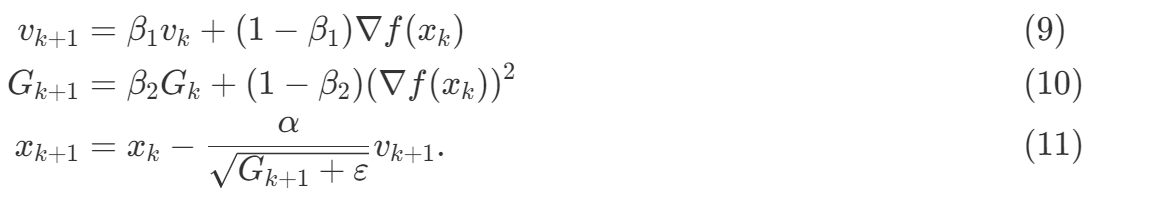

Adam converged in 3226 iterations.
Rosenbrock - Adam: Final Point = [1.00008429 1.00016885]
Adam converged in 788 iterations.
Himmelblau - Adam: Final Point = [2.9999805  2.00003831]


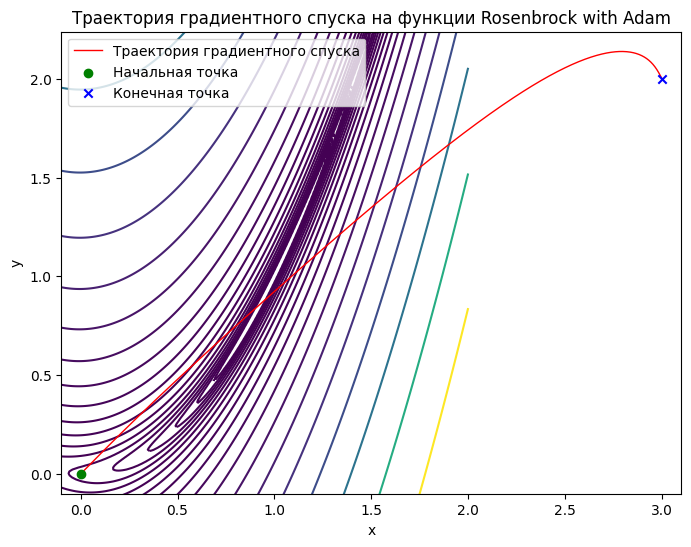

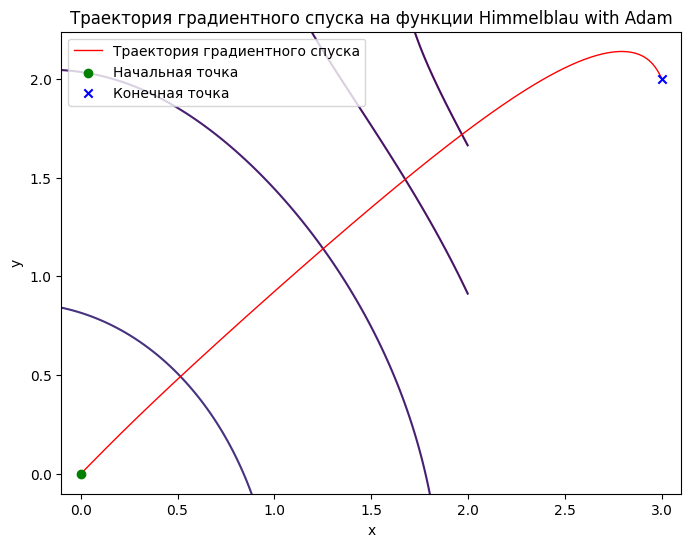

In [ ]:
# prompt: generate code for  adaptive modification gradient ADAM descent and test it

import numpy as np

def adam(start_point, grad_func, learning_rate=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8, max_iter=1000, tolerance=1e-6):
    x = np.array(start_point, dtype='float64')
    m = np.zeros_like(x)
    v = np.zeros_like(x)
    history = [x.copy()]

    for t in range(1, max_iter + 1):
        grad = grad_func(*x)
        m = beta1 * m + (1 - beta1) * grad
        v = beta2 * v + (1 - beta2) * (grad**2)
        m_hat = m / (1 - beta1**t)
        v_hat = v / (1 - beta2**t)
        new_x = x - learning_rate * m_hat / (np.sqrt(v_hat) + epsilon)
        history.append(new_x.copy())
        if np.linalg.norm(new_x - x) < tolerance:
            print(f"Adam converged in {t} iterations.")
            break
        x = new_x
    return x, np.array(history)

# Test Adam on Rosenbrock function
final_point, history = adam(start_point=(1.2, 1.2), grad_func=rosenbrock_grad, learning_rate=0.01, max_iter=10000)
print("Rosenbrock - Adam: Final Point =", final_point)

# Test Adam on Himmelblau function
final_point, history = adam(start_point=(0, 0), grad_func=himmelblau_grad, learning_rate=0.01, max_iter=10000)
print("Himmelblau - Adam: Final Point =", final_point)

visualize_gradient_descent(history, rosenbrock, "Rosenbrock with Adam")
visualize_gradient_descent(history, himmelblau, "Himmelblau with Adam")

# Запрограммировать метод эфолюции темпа обучения и/или метод выбора начального приближения и протестировать их

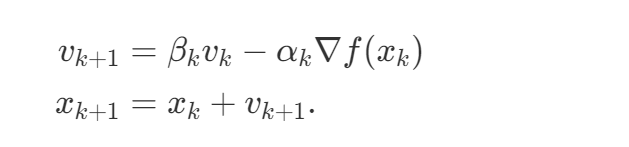

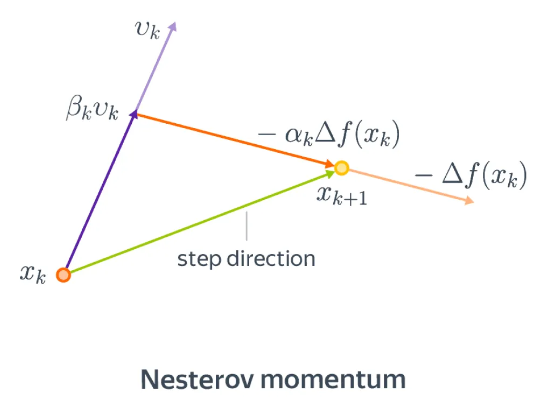

Rosenbrock:
Алгоритм сошелся за 1056 итераций.
x = [0.99989265 0.99978487]
momentum: Error + 0.00024042669623278976


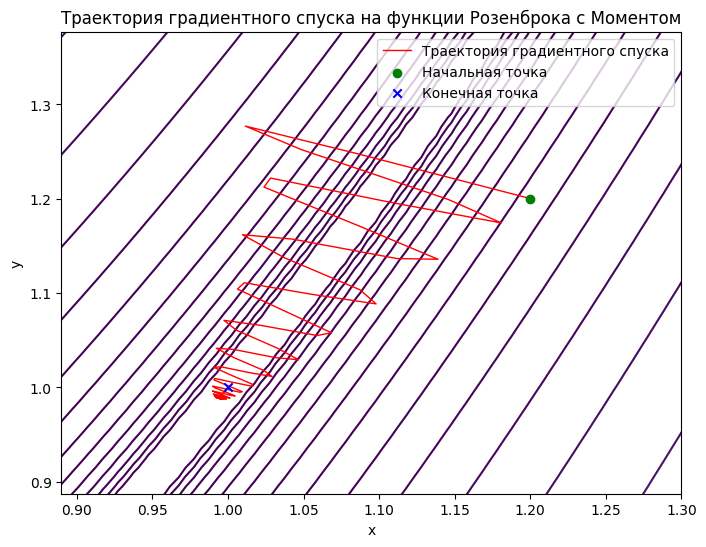


Himmelblau:
Алгоритм сошелся за 217 итераций.
x = [2.99999901 1.99999637]
momentum: Error + 3.7662141578311253e-06


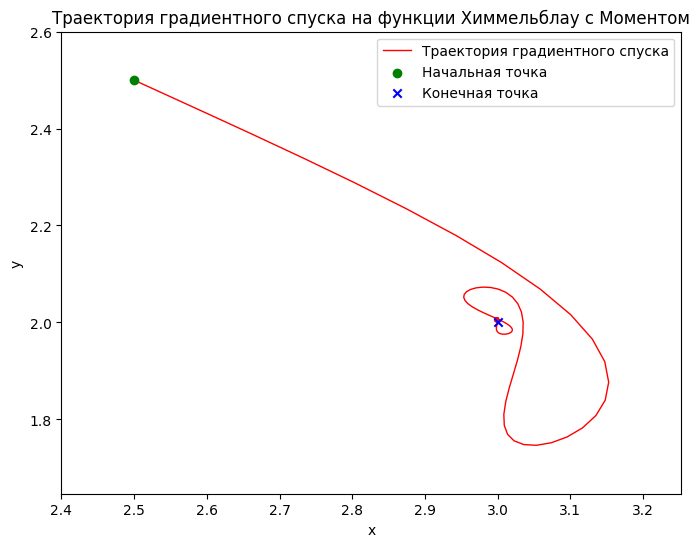

In [ ]:
import numpy as np

def momentum_gradient_descent_modified(start_point, grad_func, learning_rate=0.01, momentum=0.9, max_iter=1000, tolerance=1e-6):
    x = np.array(start_point, dtype='float64')
    history = [x.copy()]
    v = np.zeros_like(x)

    for i in range(max_iter):
        grad = grad_func(*x)

        v = momentum * v - learning_rate * grad
        new_x = x + v

        history.append(new_x.copy())

        if np.linalg.norm(new_x - x) < tolerance:
            print(f"Алгоритм сошелся за {i+1} итераций.")
            break

        x = new_x

    return x, np.array(history)

methods = ['momentum']
for method in methods:
    print("Rosenbrock:")
    learning_rate = 0.001
    max_iter = 10000
    res = (1, 1)
    start_point = (1.2, 1.2)
    if method == 'momentum':
        x, history = momentum_gradient_descent(start_point, rosenbrock_grad, learning_rate, max_iter=max_iter)
    print("x =", x)
    print(f"{method}: Error + {np.linalg.norm(res - x)}")
    visualize_gradient_descent(history, rosenbrock, "Розенброка с Моментом")

    print("\nHimmelblau:")
    learning_rate = 0.001
    max_iter = 10000
    res = (3, 2)
    start_point = (2.5, 2.5)
    if method == 'momentum':
        x, history = momentum_gradient_descent(start_point, himmelblau_grad, learning_rate, max_iter=max_iter)
    print("x =", x)
    print(f"{method}: Error + {np.linalg.norm(res - x)}")
    visualize_gradient_descent(history, himmelblau, "Химмельблау с Моментом")